In [88]:
import numpy as np
import matplotlib.pyplot as plt
from pysrc.predict_fx_from_x import lst_1d,lst_radial_basis

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 1: Approximating functions

## First part

In [78]:
A = np.loadtxt("data/linear_function_data.txt")

#### Check code: lst_1d() in  pysrc/predict_fx_from_x.py

In [80]:
lst_results = lst_1d(A[:, 0], A[:, 1])

In [53]:
b = lst_results[0]
b

array([2.64347195e-07, 7.50000229e-01])

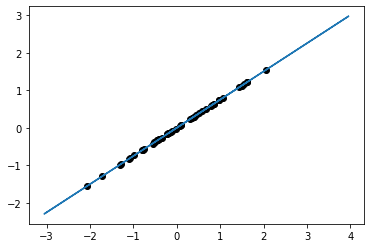

In [65]:
plt.plot(A[::20, 0], A[::20, 1], "o", c="black")
plt.plot(A[:, 0], X @ b)
plt.show()

##### Comments:
Every 20 true data points are ploted as black dots. The estimated linear function is the blue line, which is $y = 0.75x + 0$

## Second part

In [82]:
B = np.loadtxt("data/nonlinear_function_data.txt")
lst_results = lst_1d(B[:,0], B[:,1])
b = lst_results[0]
b

array([0.11114247, 0.02873498])

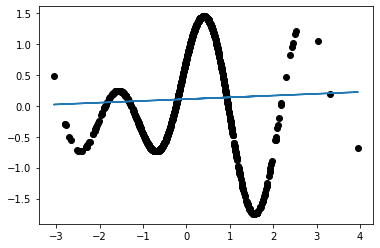

In [73]:
plt.plot(B[:, 0], B[:, 1], "o", c="black")
plt.plot(B[:, 0], X @ b)
plt.show()

##### Comments:
The estimated linear function is the blue line, which is $y = 0.0287x + 0.111$

## Third part

##### $\epsilon=1, L=10$ gives good approximation

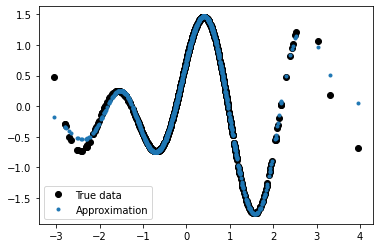

In [216]:
B = np.loadtxt("data/nonlinear_function_data.txt")
phi, lst_results = lst_radial_basis(B[:,0], B[:,1], e=1, L=10)
C=lst_results[0]

plt.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
plt.plot(B[:, 0], phi @ C, ".", label="Approximation")
plt.legend()
plt.show()

### Examine parameters

#### $\epsilon$

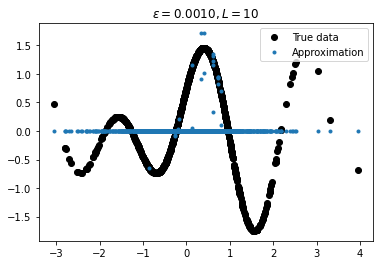

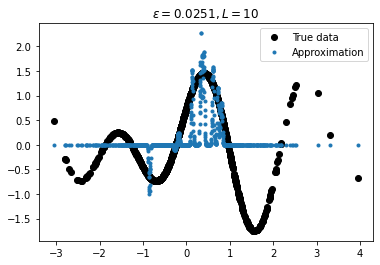

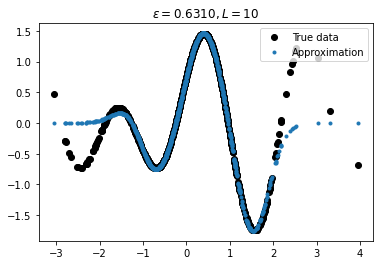

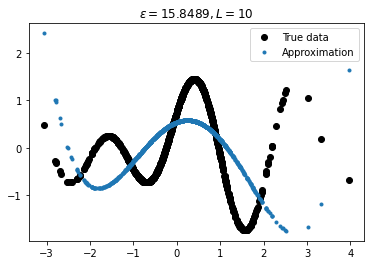

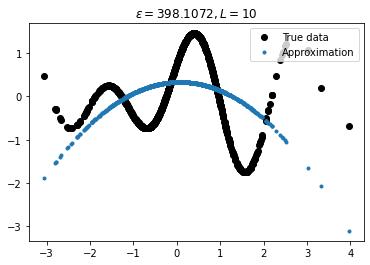

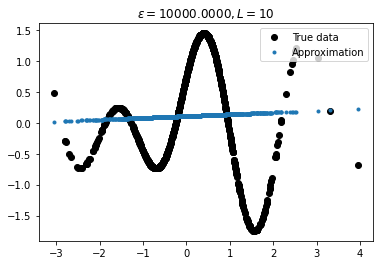

In [218]:
L=10
for e in np.logspace(-3, 4, 6):
    phi, lst_results = lst_radial_basis(B[:,0], B[:,1], e=e, L=L)
    C=lst_results[0]

    plt.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
    plt.plot(B[:, 0], phi @ C, ".", label="Approximation")
    plt.legend(loc="upper right")
    plt.title(r"$\epsilon=%.4f, L=%d$"%(e, L))
    plt.show()

### L with a bad e

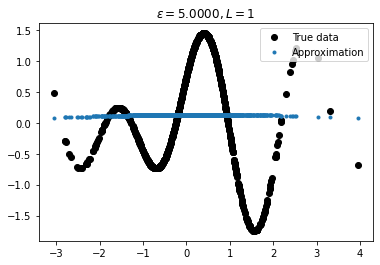

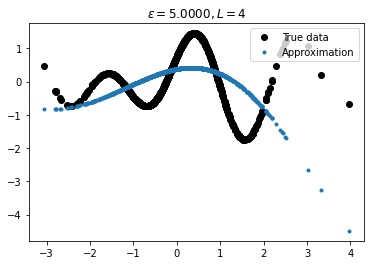

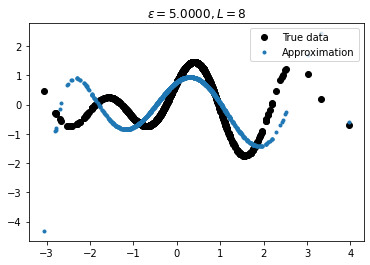

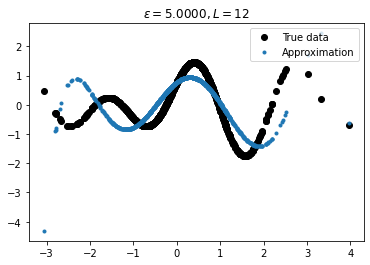

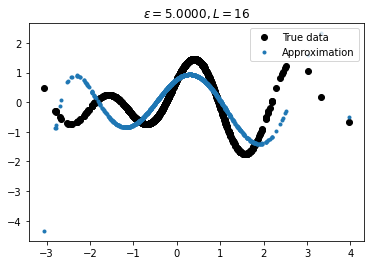

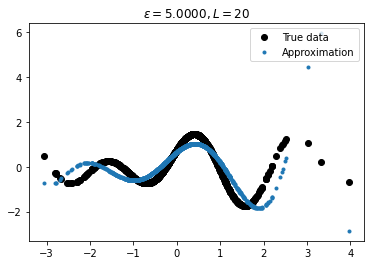

In [219]:
e=5
for L in np.linspace(1, 20, 6):
    phi, lst_results = lst_radial_basis(B[:,0], B[:,1], e=e, L=int(L))
    C=lst_results[0]

    plt.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
    plt.plot(B[:, 0], phi @ C, ".", label="Approximation")
    plt.legend(loc="upper right")
    plt.title(r"$\epsilon=%.4f, L=%d$"%(e, L))
    plt.show()

### L with an appropriate e

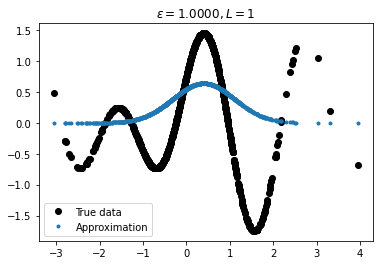

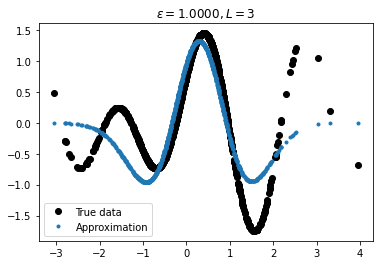

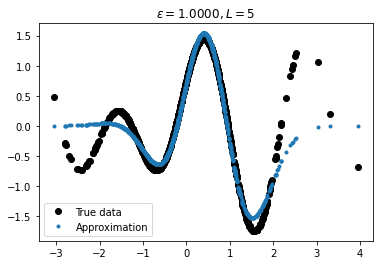

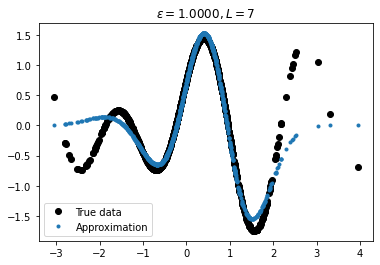

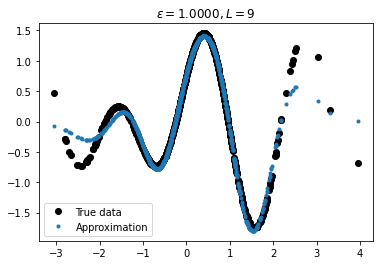

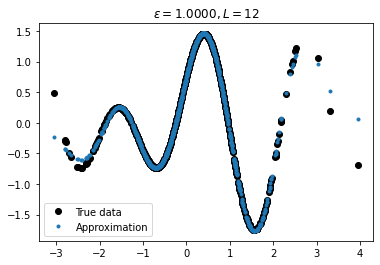

In [214]:
e=1
for L in np.linspace(1, 12, 6):
    phi, lst_results = lst_radial_basis(B[:,0], B[:,1], e=e, L=int(L))
    C=lst_results[0]

    plt.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
    plt.plot(B[:, 0], phi @ C, ".", label="Approximation")
    plt.legend()
    plt.title(r"$\epsilon=%.4f, L=%d$"%(e, L))
    plt.show()

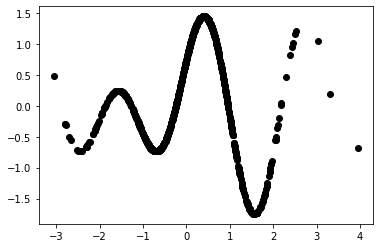

In [156]:
plt.plot(B[:, 0], B[:, 1], "o", c="black", label="True data")
